In [50]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from keras.utils import np_utils
from sklearn.utils import shuffle
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pickle
import tensorflow as tf
import math as m

# Load Data 
with open('data.Feeling', 'rb') as f:
    (x_train, y_train) = pickle.load(f)

# Reshape Data
x_pre_0 = x_train[13]
x_pre_1 = x_train[23]
x_pre_2 = x_train[43]
x_pre_3 = x_train[73]


# Preprocessing Data
x_train = x_train.astype('float32')
x_train /= 255

# Encoding Y
y_train = np_utils.to_categorical(y_train, 4)

# Shuffe Data
x_train, y_train = shuffle(x_train, y_train)


model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu',kernel_initializer='he_uniform', padding ='same', input_shape = (150,150,3)))
model.add(Conv2D(32, (3,3), activation='relu',kernel_initializer='he_uniform', padding ='same'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64, (3,3), activation='relu',kernel_initializer='he_uniform', padding ='same'))
model.add(Conv2D(64, (3,3), activation='relu',kernel_initializer='he_uniform', padding ='same'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128, (3,3), activation='relu',kernel_initializer='he_uniform', padding ='same'))
model.add(Conv2D(128, (3,3), activation='relu',kernel_initializer='he_uniform', padding ='same'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(4, activation='softmax'))
model.summary()


def plot_history(history_fine):
  f1 = history_fine.history['acc']
  val_f1 = history_fine.history['val_acc']

  loss = history_fine.history['loss']
  val_loss = history_fine.history['val_loss']

  plt.figure(figsize=(8, 8))
  plt.subplot(2, 1, 1)
  plt.plot(f1, label='Acc')
  plt.plot(val_f1, label='Validation Acc')
  plt.legend(loc='lower right')
  plt.title('Accuracy')

  plt.subplot(2, 1, 2)
  plt.plot(loss, label='Loss')
  plt.plot(val_loss, label='Validation Loss')
  plt.legend(loc='upper right')
  plt.title('Loss')
  plt.xlabel('epoch')
  plt.show()

def plot_reg_history(history_fine):
  loss = history_fine.history['loss']
  val_loss = history_fine.history['val_loss']
  plt.subplot(2, 1, 2)
  plt.plot(loss, label='Loss')
  plt.plot(val_loss, label='Validation Loss')
  plt.legend(loc='upper right')
  plt.title('Loss')
  plt.xlabel('epoch')
  plt.show()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_42 (Conv2D)          (None, 150, 150, 32)      896       
                                                                 
 conv2d_43 (Conv2D)          (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 75, 75, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_44 (Conv2D)          (None, 75, 75, 64)        18496     
                                                                 
 conv2d_45 (Conv2D)          (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 37, 37, 64)       0         
 g2D)                                                 

In [51]:
opt = Adam(lr = 0.001)
model.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['acc'])
his = model.fit(x_train, y_train, epochs = 15, batch_size = 64, validation_split = 0.2)

Epoch 1/15


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - 1s 903ms/step - loss: 1.5270 - acc: 0.2500 - val_loss: 13.0051 - val_acc: 0.1875
Epoch 2/15
1/1 [==============================] - 0s 158ms/step - loss: 10.5438 - acc: 0.2656 - val_loss: 7.2195 - val_acc: 0.3125
Epoch 3/15
1/1 [==============================] - 0s 152ms/step - loss: 6.9809 - acc: 0.3438 - val_loss: 2.1889 - val_acc: 0.2500
Epoch 4/15
1/1 [==============================] - 0s 152ms/step - loss: 2.2065 - acc: 0.2969 - val_loss: 1.3782 - val_acc: 0.4375
Epoch 5/15
1/1 [==============================] - 0s 152ms/step - loss: 1.3770 - acc: 0.4375 - val_loss: 1.3948 - val_acc: 0.2500
Epoch 6/15
1/1 [==============================] - 0s 153ms/step - loss: 1.3421 - acc: 0.3906 - val_loss: 1.3979 - val_acc: 0.3125
Epoch 7/15
1/1 [==============================] - 0s 155ms/step - loss: 1.2869 - acc: 0.3750 - val_loss: 1.3890 - val_acc: 0.4375
Epoch 8/15
1/1 [==============================] - 0s 152ms/step - loss: 1.2918 - acc: 0.4531 - val_

In [44]:
label = ['Buon', 'Gian du', 'Hanh phuc', 'Ngac nhien']

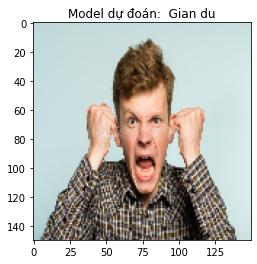

In [52]:
plt.title("Model dự đoán:  " + label[np.argmax(model.predict(x_pre_1.reshape(1,150,150,3)))])
plt.imshow(cv2.cvtColor(x_pre_1, cv2.COLOR_BGR2RGB), cmap=plt.get_cmap('gray'))

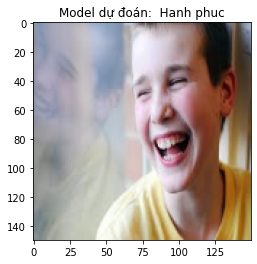

In [53]:
plt.title("Model dự đoán:  " + label[np.argmax(model.predict(x_pre_2.reshape(1,150,150,3)))])
plt.imshow(cv2.cvtColor(x_pre_2, cv2.COLOR_BGR2RGB), cmap=plt.get_cmap('gray'))

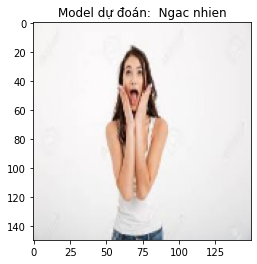

In [54]:
plt.title("Model dự đoán:  " + label[np.argmax(model.predict(x_pre_3.reshape(1,150,150,3)))])
plt.imshow(cv2.cvtColor(x_pre_3, cv2.COLOR_BGR2RGB), cmap=plt.get_cmap('gray'))

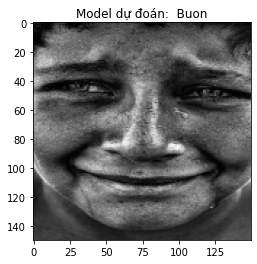

In [55]:
plt.title("Model dự đoán:  " + label[np.argmax(model.predict(x_pre_0.reshape(1,150,150,3)))])
plt.imshow(cv2.cvtColor(x_pre_0, cv2.COLOR_BGR2RGB), cmap=plt.get_cmap('gray'))